# <b>Performance Assessment | D206 Data Cleaning<b>
&emsp;Ryan L. Buchanan
<br>&emsp;Student ID:  001826691
<br>&emsp;Masters Data Analytics (12/01/2020)
<br>&emsp;Program Mentor:  Dan Estes
<br>&emsp;(385) 432-9281 (MST)
<br>&emsp;rbuch49@wgu.edu

## <span style="color:red">Part  I: Research Question</span>

### <span style="color:green"><b>A. Question or Decision</b>:</span>
Can we determine which individual customers are at high risk of churn?  And, can we determine which features are most significant to churn?

### <span style="color:green"><b>**A1. Alternative Question</b>:</span>
Also, Are there certain responses to survey that correlate with customer churn?

### <span style="color:green"><b>B. Required Variables</b>:</span>
The data set is 10,000 customer records of a popular telecommunications company. The dependent variable (target) in question is whether or not each customer has continued or discontinued service within the last month.  This column is titled "Churn."  
Independent variables or predictors that may lead to identifying a relationship with the dependent variable of "Churn" within the dataset include: 
1. Services that each customer signed up for (for example, multiple phone lines, technical support add-ons or streaming media) 
2. Customer account information (customers' tenure with the company, payment methods, bandwidth usage, etc.)
3. Customer demographics (gender, marital status, income, etc.).  
4. Finally, there are eight independent variables that represent responses customer-perceived importance of company services and features.  

The data is both numerical (as in the yearly GB bandwidth usage; customer annual income) and categorical (a "Yes" or "No" for Churn; customer job).

## <span style="color:red">Part II: Data-Cleaning Plan</span>

### <span style="color:green"><b>C1. Plan to Find Anomalies</b>:</span>
My approach will include:
<br>&ensp; 1. Back up my data and the process I am following as a copy to my machine and, since this is a manageable dataset, to GitHub using command line and gitbash.
<br>&ensp; 2. Read the data set into Python using Pandas read_csv command.
<br>&ensp; 3. Evaluate the data struture to better understand input data.
<br>&ensp; 4. Naming the dataset as a the variable "churn_df" and subsequent useful slices of the dataframe as "df".
<br>&ensp; 5. Examine potential misspellings, awkward variable namimg & missing data.
<br>&ensp; 6. Find outliers that may create or hide statistical significance using histograms.
<br>&ensp; 7. Imputing records missing data with meaningful measures of central tendency (mean, median or mode) or simply remove outliers that are several standard deviations above the mean.

### <span style="color:green"><b>C2. Justification of Approach</b>:</span>
Though the data seems to be inexplicably missing quite a bit of data (such as the many NAs in customer tenure with the company) from apparently random columns, this approach seems like a good first approach in order to put the data in better working order without needing to involve methods of initial data collection or querying the data-gatherers on reasons for missing information. Also, this the first dataset that I've clean, so I followed the procedures practice in the performance lab as well as tips from StackOverflow and other tutorial resources.

### <span style="color:green"><b>C3. Justification of Tools</b>:</span>
I will use the Python programming language as I have a bit of a background in Python having studied machine learning independently over the last year before beginning this masters program and its ability to perform many things right "out of the box."  Python provides clean, intuitive and readable syntax that has become ubiquitous across in the data science industry.  Also, I find the Jupyter notebooks a convenient way to run code visually, in its attractive single document markdown format, the ability to display results of code and graphic visualizations and provide crystal-clear running documentation for future reference.   A thorough installation and importation of Python packages and libraries will provide specially designed code to perfom complex data science tasks rather than personally building them from scratch.  This will include: 
<br>&ensp; • NumPy - to work with arrays
<br>&ensp; • Pandas - to load datasets
<br>&ensp; • Matplotlib - to plot charts
<br>&ensp; • Scikit-learn - for machine learning model classes
<br>&ensp; • SciPy - for mathematical problems, specifically linear algebra transformations
<br>&ensp; • Seaborn - for high-level interface and atttractive visualizations

A quick, precise example of loading a dataset and creating a variable efficiently is using to call the Pandas library and its subsequent "read_csv" function in order to manipulate our data as a dataframe:
<span style="color:coral">
<br>&ensp; import pandas as pd
<br>&ensp; df = pd.read_csv('Data.csv')
</span>

### <span style="color:green"><b>C4. Provide the Code</b>:</span>

In [1]:
# Install necessary packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib

In [2]:
# Standard imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [3]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [4]:
# Load data set into Pandas dataframe
churn_df = pd.read_csv('churn_raw_data.csv')

In [5]:
# Display Churn dataframe
churn_df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [6]:
# List of Dataframe Columns
df = churn_df.columns
print(df)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


In [7]:
# Remove redundant "Unnamed" column at beginning & display first five records
df = churn_df.drop(churn_df.columns[0], axis = 1)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [8]:
# Rename last 8 survey columns for better description of variables
df.rename(columns = {'item1':'Responses', 
                    'item2':'Fixes', 
                     'item3':'Replacements', 
                     'item4':'Reliability', 
                     'item5':'Options', 
                     'item6':'Respectful', 
                     'item7':'Courteous', 
                     'item8':'Listening'}, 
          inplace=True)

In [9]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Responses', 'Fixes',
       'Replacements', 'Reliability', 'Options', 'Respectful', 'Courteous',
       'Listening'],
      dtype='object')

In [10]:
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [11]:
# Display number of records in dataset
len(df)

10000

In [12]:
# Find number of records and columns of dataset
df.shape

(10000, 51)

In [13]:
# Describe Churn dataset statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [14]:
# Remove less meaningful variables from statistics description
df_stats = df.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng'])
df_stats.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [15]:
# Calculate Churn Rate
df.Churn.value_counts() / len(df)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

In [16]:
# Review data types (numerical => "int64" & "float64"; & categorical => "object") in data set
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple

In [17]:
# Re-validate column data types and missing values
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['CaseOrder', 'Zip', 'Population', 'Email', 'Contacts',
        'Yearly_equip_failure', 'Responses', 'Fixes', 'Replacements',
        'Reliability', 'Options', 'Respectful', 'Courteous', 'Listening'],
       dtype='object'),
 dtype('float64'): Index(['Lat', 'Lng', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
        'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
       dtype='object'),
 dtype('O'): Index(['Customer_id', 'Interaction', 'City', 'State', 'County', 'Area',
        'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender',
        'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet',
        'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
       dtype='object')}

In [18]:
# Display non-null fields within each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [19]:
# Find missing values 
df.isnull()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Access only rows from dataframe containing missing values
df.isnull().any(axis=1)

0        True
1       False
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

In [21]:
# Woah, lots of empty fields!  Immediately noticeable as "True" in columns of "Children", "Age", "Income", "Techie", "Phone", "Tenure"
# Display the specific columns with NAs
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
Timezone                False
Job                     False
Children                 True
Age                      True
Education               False
Employment              False
Income                   True
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                   True
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                    True
Multiple                False
OnlineSecurity          False
OnlineBack

In [22]:
# Confirm missing observations numbers
data_nulls = df.isnull().sum()
print(data_nulls)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [23]:
# Store rows with missing values in a new variable
rows_with_missing_values = df.isnull().any(axis=1)
df[rows_with_missing_values]

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,...,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,...,114.754111,979.612708,2,2,2,5,2,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,P175475,c60df12b-a50b-4397-ae57-98381a0d3960,West Kill,NY,Greene,12492,42.18491,-74.33574,210,...,143.687900,4945.756000,4,3,4,4,3,3,4,4
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,168.220900,4159.306000,4,4,4,4,4,4,4,5


In [24]:
# Examine columns for misspellings in categorical variables using unique() method
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [25]:
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [26]:
df['Timezone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [27]:
df['Job'].unique()

array(['Environmental health practitioner', 'Programmer, multimedia',
       'Chief Financial Officer', 'Solicitor', 'Medical illustrator',
       'Chief Technology Officer', 'Surveyor, hydrographic',
       'Sales promotion account executive',
       'Teaching laboratory technician', 'Museum education officer',
       'Teacher, special educational needs', 'Maintenance engineer',
       'Engineer, broadcasting (operations)', 'Learning disability nurse',
       'Automotive engineer', 'Amenity horticulturist',
       'Applications developer', 'Immunologist', 'Engineer, electrical',
       'Broadcast presenter', 'Counsellor', 'Geophysical data processor',
       'Designer, multimedia', 'Event organiser',
       'Equality and diversity officer', 'Psychiatrist',
       'Surveyor, commercial/residential', 'Civil Service administrator',
       'Radiographer, diagnostic', 'Air traffic controller', 'Dietitian',
       'Therapist, occupational', 'Building services engineer',
       'Information 

In [28]:
# Well then, how many unique jobs are there and will this variable help us out much?
len(df['Job'].unique())

639

In [29]:
df['Children'].unique()

array([nan,  1.,  4.,  0.,  3.,  2.,  7.,  5.,  9.,  6., 10.,  8.])

In [30]:
df['Age'].unique()

array([68., 27., 50., 48., 83., nan, 49., 86., 23., 56., 30., 39., 63.,
       60., 61., 52., 75., 77., 47., 70., 69., 45., 40., 82., 26., 25.,
       66., 72., 41., 44., 43., 84., 59., 31., 51., 58., 73., 33., 42.,
       81., 87., 54., 67., 46., 24., 20., 71., 32., 29., 80., 53., 79.,
       65., 35., 34., 74., 55., 76., 57., 38., 78., 19., 36., 88., 62.,
       37., 28., 22., 85., 89., 18., 21., 64.])

In [31]:
# Examine age range
age_range = df['Age'].unique()
print(sorted(age_range))

[23.0, 25.0, 26.0, 27.0, 30.0, 31.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 59.0, 61.0, 68.0, 83.0, nan, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 28.0, 29.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 42.0, 46.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0]


In [32]:
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [33]:
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [34]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [35]:
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [36]:
df['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [37]:
df['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [38]:
# Display any duplicate rows in the dataframe.
data_duplicates = df.loc[df.duplicated()]
print(data_duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Responses, Fixes, Replacements, Reliability, Options, Respectful, Courteous, Listening]
Index: []

[0 rows x 51 columns]


In [39]:
# Identify the standard deviation of every numeric column in the dataset
data_std = df_stats.std()
print(data_std)

Population              14432.698671
Children                    2.154758
Age                        20.753928
Income                  28358.469482
Outage_sec_perweek          7.025921
Email                       3.025898
Contacts                    0.988466
Yearly_equip_failure        0.635953
Tenure                     26.438904
MonthlyCharge              43.335473
Bandwidth_GB_Year        2187.396807
Responses                   1.037797
Fixes                       1.034641
Replacements                1.027977
Reliability                 1.025816
Options                     1.024819
Respectful                  1.033586
Courteous                   1.028502
Listening                   1.028633
dtype: float64


In [40]:
data_nulls = df_stats.isnull().sum()
print(data_nulls)

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

In [41]:
# Impute missing fields for variables Children, Age, Income, Tenure and Bandwidth_GB_Year with median or mean
df_stats['Children'] = df['Children'].fillna(df['Children'].median())
df_stats['Age'] = df['Age'].fillna(df['Age'].median())
df_stats['Income'] = df['Income'].fillna(df['Income'].median())
df_stats['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df_stats['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())

In [42]:
data_nulls = df_stats.isnull().sum()
print(data_nulls)

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

## <span style="color:green">Anomaly Detection & Data Visualization</span>

## <span style="color:green">Extract Clean dataset to 'churn_clean.csv'</span>

In [43]:
# Extract Clean dataset
df_stats.to_csv('churn_clean.csv')

In [44]:
# Reload cleaned data & remove all variable except user services payment info and survey data
churn_user = pd.read_csv('churn_clean.csv')

In [45]:
# Slice off all but last eleven service realted variables
data = churn_user.loc[:, 'Tenure':'Listening']
data.head()

,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## <span style="color:green">PCA (D206 Performance Lab)</span>

In [46]:
# Import Scikit Learn PCA application
from sklearn.decomposition import PCA

In [47]:
# Normalize the data
churn_normalized = (data - data.mean()) / data.std()

In [48]:
# Select number of components to extract
pca = PCA(n_components = data.shape[1])

In [49]:
# Create a list of PCA names
churn_numeric = data[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Responses', 
                       'Fixes', 'Replacements', 'Reliability', 'Options', 
                       'Respectful', 'Courteous', 'Listening']]
pcs_names = []
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']


In [50]:
churn_numeric.head()

,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectful,Courteous,Listening
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [51]:
# Call PCA application & convert the dataset of  19 variables into a dataset of 19 components
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                        columns = pcs_names)

In [52]:
# For a scree plot import matplotlib & seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


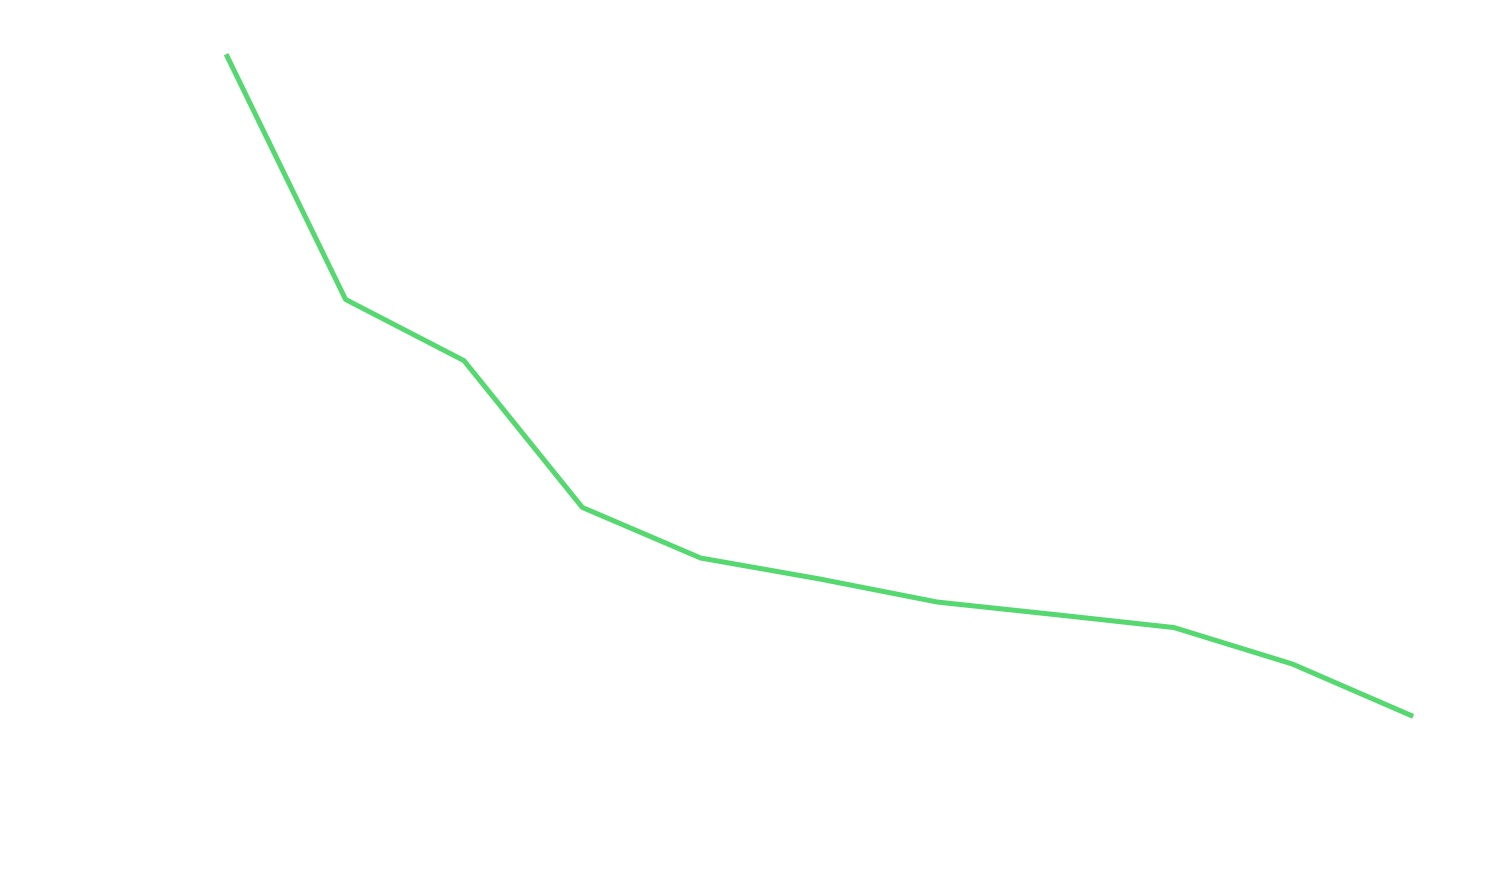

In [53]:
# Run the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();

In [55]:
# Extract the eigenvalues
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

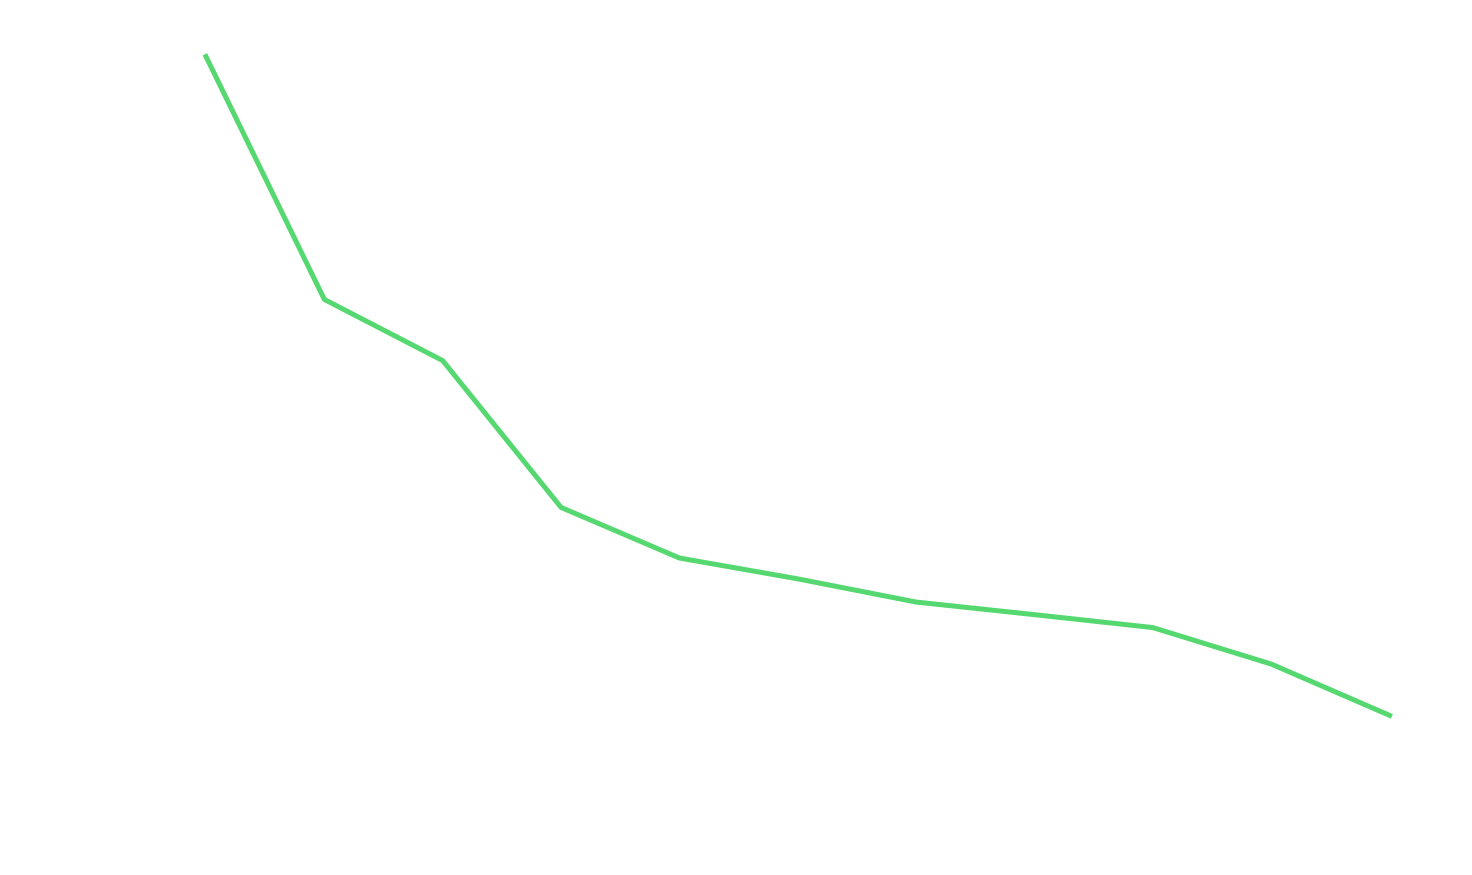

In [56]:
# Plot the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

In [57]:
# Select the fewest components 
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.26792660623963066
PC2 0.44053732880229357
PC3 0.5891444522248594
PC4 0.6801579842425083
PC5 0.7513217054372497
PC6 0.8143117094101318
PC7 0.8681970531672316
PC8 0.9171387362588829
PC9 0.9610122820002187
PC10 0.9905736363144831
PC11 1.0


In [58]:
# Above, we see that 89% of variance is explained by 14 components
# Create a rotation 
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)
print(rotation)

                        PC1       PC2       PC3       PC4       PC5       PC6  \
Tenure            -0.010403  0.701838 -0.072209 -0.063594  0.005683 -0.011155   
MonthlyCharge      0.000317  0.041147 -0.014151  0.996995 -0.022136  0.015231   
Bandwidth_GB_Year -0.012166  0.703079 -0.074222  0.004399  0.009590  0.003466   
Responses          0.458932  0.031325  0.281154  0.018568 -0.070233 -0.119149   
Fixes              0.434134  0.042559  0.282404  0.007508 -0.106632 -0.169752   
Replacements       0.400639  0.034665  0.281118 -0.019631 -0.173742 -0.255336   
Reliability        0.145799 -0.050367 -0.567815 -0.010310 -0.171334 -0.483328   
Options           -0.175633  0.066334  0.587335 -0.000047  0.135949  0.060124   
Respectful         0.405207 -0.012680 -0.183447  0.004596 -0.062342  0.064609   
Courteous          0.358342 -0.003886 -0.181697 -0.027959 -0.182406  0.806166   
Listening          0.308925 -0.017396 -0.131173  0.015574  0.931612 -0.011133   

                        PC7

In [59]:
# Output loadings for components
loadings = pd.DataFrame(pca.components_.T,
                       columns = pcs_names,
                       index = data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Tenure,-0.010403,0.701838,-0.072209,-0.063594,0.005683,-0.011155,0.007419,-0.011527,0.006935,0.003286,-0.705445
MonthlyCharge,0.000317,0.041147,-0.014151,0.996995,-0.022136,0.015231,-0.018038,-0.004316,0.023690,-0.013785,-0.047865
Bandwidth_GB_Year,-0.012166,0.703079,-0.074222,0.004399,0.009590,0.003466,0.003701,-0.002364,-0.008068,0.008529,0.706925
Responses,0.458932,0.031325,0.281154,0.018568,-0.070233,-0.119149,-0.045963,0.025431,-0.240574,0.793237,-0.004306
Fixes,0.434134,0.042559,0.282404,0.007508,-0.106632,-0.169752,-0.065414,0.074400,-0.592131,-0.573832,-0.002217
Replacements,0.400639,0.034665,0.281118,-0.019631,-0.173742,-0.255336,-0.146887,-0.396333,0.673088,-0.177665,0.014933
Reliability,0.145799,-0.050367,-0.567815,-0.010310,-0.171334,-0.483328,-0.443353,0.431528,0.087207,0.018301,0.002283
Options,-0.175633,0.066334,0.587335,-0.000047,0.135949,0.060124,-0.209767,0.693861,0.265474,-0.042012,-0.002514
Respectful,0.405207,-0.012680,-0.183447,0.004596,-0.062342,0.064609,0.757954,0.402835,0.230319,-0.063972,0.001604
Courteous,0.358342,-0.003886,-0.181697,-0.027959,-0.182406,0.806166,-0.379136,0.067889,0.067293,-0.040946,-0.006875


In [60]:
# Finally, extract reduced dataset & print 3 components
churn_reduced = churn_pca.iloc[ : , 0:3]
print(churn_reduced)

           PC1       PC2       PC3
0     1.923875 -1.421955  1.903125
1    -0.199798 -1.706801  0.538766
2    -0.667923 -0.985940  0.227390
3     0.046465 -0.730628  2.282040
4     1.326741 -1.924880  0.825729
...        ...       ...       ...
9995 -2.097964  1.961837  0.104147
9996  1.917485  1.645946  0.611009
9997  1.431918  0.323573  0.028288
9998  2.011460  2.187756 -0.079864
9999 -2.266364  1.591986 -0.819973

[10000 rows x 3 columns]


## <span style="color:red">Part III: Data Cleaning</span>

### <span style="color:green">D. Data Cleaning Summary</span>

D1.<b>Cleaning Findings</b>:  There was much missing data with meaningful variable fields including Children, Age, Income, Tenure and Bandwidth_GB_Year.  Given mean and variance of these variables, it seemed reasonable to impute missing values with median values.  Many categorical (such as whether or not the customer was "Techie") & non-numeric (columns for customer ID numbers & related customer transaction IDs) data were not included in analysis given they seemed less meaningful to interpretation and decision-making.  The anomalies discovered were not significant & were mitigated as follows.

D2.<b>Justification of Mitigation Methods</b>:  Anomalies were mitigated by . . . <b style="color:red">Justify your methods for mitigating each type of discovered anomaly in the data set.</b>

D3.<b>Summary of Outcomes</b>:  Once the the missing values where . . .  <b style="color:red">Summarize the outcome from the implementation of each data-cleaning step.</b>

D4.<b>Mitigation Code</b>:  (see code above and Panopto recording)

D5.<b>Clean Data</b>: (see attached file <b style="color:green">'churn_clean.csv'</b>)

D6.<b>Limitations</b>: Limitations given the telecom company data set are that the data are not coming from an warehouse.  In this scenario, it is as though I initiated and gathered the data.  So, I am not able to reach out to the staff that organized & gathered this information to ask them why certain NAs are there, why are fields such as age or yearly bandwidth usage missing information that might be relevant to answering questions about customer retention or churn.  In a real world project, you would be able to go down to the department where these folks worked and fill in the empty fields or discover why fields are left blank.

D7. The accurate factual data for missing fields that might be recoverable given the ability to access the staff in the data warehouse, such as company tenure with the company, may give a slighty different overall picture to the analysis. While imputation may provide a path to move forward and give decision-makers reasonable answers, there really is no reason for these data to be missing.  The limitations here could be remedied by instituting stricter data acquisition procedures, follow-ups & feedback.

### <span style="color:green">E. PCA Application</span>

E1. <b>Principal Components</b>:  The principal components, and what I determined to be "most important", in this dataset include survey responses to:
<ul>
    <li>Timely Responses</li>
    <li>Timely Fixes</li>
    <li>Timely Replacements</li>
    <li>Respectful Response</li>
</ul> 

E2. <b>Criteria Used</b>:  I had a sneaking intuitition that these might be the most important features to predict why a customer might or might not leave a company.  However, confirmation bias is not what confirmed this forethought.  I used a scree plot & extracted the eigenvalues for visualization of where the "elbow was bending".  The elbow bent at about 3 but kept an eigenvalue above 1 until the tenth component.  Then, the fewest number of components were selected based on the 89% explanation using the Numpy cumsum method. A rotation & loadings were created which suggested the "most important" features of the dataset.</b>

E3. <b>Benefits</b>:  Their is as the loadings suggest the variables involved in timely action with regard to customer satisfaction should be given greater emphasis and hopefully help reduce the the churn rate from the large number of 27% & "increase the retention period of customers" by targeting more resources in the direction prompt customer service (Ahmad, 2019).  Again, this seems an intuitive result but now decision-makers in the company of reasonable verification of what might have been a "hunch".

## <span style="color:red">Part IV: Supporting Documents</span>

### <span style="color:green">F. Video</span>
(see Panopto recording)

### <span style="color:green">G. Sources for Third-Party Code</span>
Cmdline. (2018, March 20). &ensp; <i>How To Change Column Names and Row Indexes in Pandas?</i> &ensp; Python and R Tips.  <br>&emsp;https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

Larose, C. D. & Larose, D. T. &ensp; (2019). &ensp; <i>Data Science: Using Python and R.</i> &ensp; John Wiley & Sons, Inc.

Poulson, B. &ensp; (2016). &ensp; <i>Data Science Foundations: Data Mining</i> &ensp; LinkedIn Learning. 
<br>&emsp;https://www.linkedin.com/learning/data-science-foundations-data-mining/anomaly-detection-in-python?u=2045532

Sree. &ensp; (2020, October 26). &ensp; <i>Predict Customer Churn in Python.</i> &ensp; Towards Data Science.  <br>&emsp;https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

VanderPlas, J. &ensp; (2017). &ensp; <i>Python Data Science Handbook: Essential Tools for Working with Data.</i>  <br>&emsp;O'Reilly Media, Inc.

### <span style="color:green">H. Sources</span>
Ahmad, A. K., Jafar, A & Aljoumaa, K. &ensp; (2019, March 20). &ensp; <i>Customer churn prediction in telecom using machine <br>&emsp;learning in big data platform</i>. &ensp; Journal of Big Data.  <br>&emsp;https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0191-6

Altexsoft. &ensp; (2019, March 27). &ensp; <i>Customer Churn Prediction Using Machine Learning: Main Approaches and Models</i>.  <br>&emsp;Altexsoft.  <br>&emsp;https://www.altexsoft.com/blog/business/customer-churn-prediction-for-subscription-businesses-using-machine-learning-main-approaches-and-models/

Frohbose, F. &ensp; (2020, November 24). &ensp; <i>Machine Learning Case Study: Telco Customer Churn Prediction</i>.  <br>&emsp;Towards Data Science.  <br>&emsp;https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d

Mountain, A. &ensp; (2014, August 11). &ensp; <i>Data Cleaning</i>. &ensp; Better Evaluation.  <br>&emsp;https://www.betterevaluation.org/en/evaluation-options/data_cleaning